In [11]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv', usecols=lambda x: x!='id')
test = pd.read_csv('test.csv', usecols=lambda x: x!='id')
files = [train,test]

train.sample(10)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
6320,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.450103,0.406618,32.274591,5403.69852
9910,25.0,0.50,0.25,0.50,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.447781,0.425220,33.289052,4924.35736
10804,12.5,0.25,0.38,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.566319,0.444588,37.779379,6569.24967
3222,12.5,0.25,0.25,0.50,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.611726,0.514873,43.334772,6822.97163
6814,25.0,0.25,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.462743,0.432266,33.442120,5333.87334
13394,25.0,0.50,0.38,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.403217,0.395436,31.394569,4203.02762
8126,25.0,0.50,0.38,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.498716,0.424657,34.707880,5954.51315
3288,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.509158,0.444147,36.976361,6251.61184
8599,12.5,0.25,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.601358,0.506605,42.939977,6731.61844
14569,25.0,0.50,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.569330,0.463276,37.712513,6615.69006


### Check for missing values and need for imputation
### Understand dtypes

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [6]:
train.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


### Checking and removing duplicates

In [22]:
train.duplicated().sum()

7

In [23]:
train = train[~train.duplicated(keep='last')]

### Plot and check for correlations

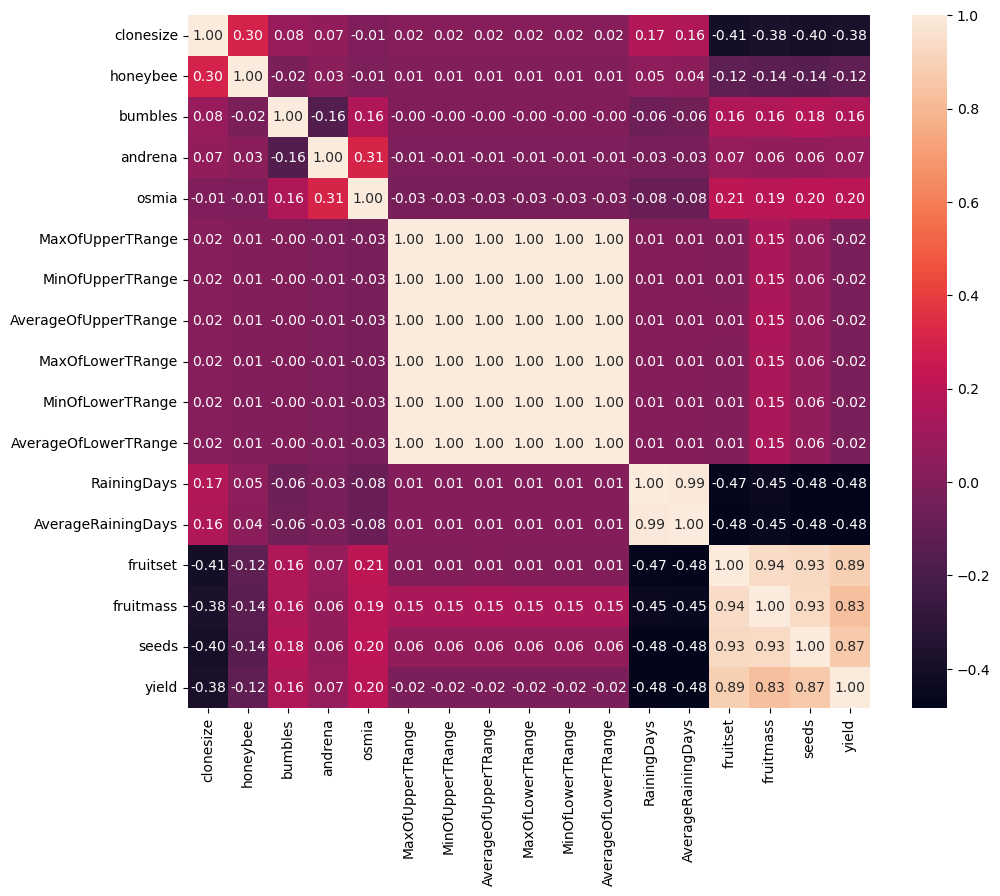

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 9))
correlation_plot = sns.heatmap(train.corr(), annot=True, fmt=".2f")

In [24]:
# Seems like all except and one TRange featuer and one Rain Feature can be removed
train.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [39]:

columns_to_drop = ['MaxOfUpperTRange', 'MinOfUpperTRange',  'MaxOfLowerTRange', 'MinOfLowerTRange',
                   'AverageOfLowerTRange','RainingDays']
remainder_columns = [col for col in train.columns if (col not in columns_to_drop) and (col != 'yield')]


## Prepare data for data algorithms

In [30]:
# Divide data into training and test
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(train.iloc[:,:-1],train.iloc[:,-1], test_size=.2,shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12225, 16), (3057, 16), (12225,), (3057,))

In [25]:
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler()


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    'Lasso': Lasso(),
    "ElasticNet" : ElasticNet(),
    "Random Forest Regressor": RandomForestRegressor(n_jobs=-1),
    "Bagging Regressor":BaggingRegressor(n_jobs=-1),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Gradient Boosting Regressor":GradientBoostingRegressor(),
    "KNN Regressor":KNeighborsRegressor(),
}
# Define the scaler
num_scaler = StandardScaler()

preprocessing = ColumnTransformer(
    [
        ('drop_columns','drop', columns_to_drop),
        ('standard_scaler',num_scaler,remainder_columns)
    ]
)

for name, model in models.items():
    
   model_pipeline = Pipeline([
       
       ('preprocessing',preprocessing),
       (name,model)
   ])
   
   model_pipeline.fit(X_train,y_train)
   y_pred = model_pipeline.predict(X_test)
   mae = mean_absolute_error(y_test,y_pred)
   
   print(f"For model {name}, the MAE is {mae}")


For model Linear Regression, the MAE is 367.07662172031326
For model Ridge Regression, the MAE is 367.0800578363073
For model Lasso, the MAE is 367.0578257856509
For model ElasticNet, the MAE is 443.3942426252006
For model Random Forest Regressor, the MAE is 362.16080142515
For model Bagging Regressor, the MAE is 387.7417281209465
For model Adaboost Regressor, the MAE is 597.4579532388037
For model Gradient Boosting Regressor, the MAE is 348.51614041101703
For model KNN Regressor, the MAE is 433.4268343467451
